In [169]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
survey = pd.read_csv('/Users/danielle.arneson/Desktop/survey.csv')

In [163]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User Progress Id              583 non-null    int64  
 1   Survey Id                     583 non-null    int64  
 2   Survey Title                  583 non-null    object 
 3   Language                      0 non-null      float64
 4   Mode                          530 non-null    object 
 5   Wave Start Date               583 non-null    object 
 6   Wave End Date                 583 non-null    object 
 7   Status                        583 non-null    object 
 8   Participant Id                0 non-null      float64
 9   Publish Id                    583 non-null    int64  
 10  Instance                      583 non-null    int64  
 11  User Id                       583 non-null    int64  
 12  Contact Id                    583 non-null    object 
 13  Exter

In [164]:
survey.head(10)

,User Progress Id,Survey Id,Survey Title,Language,Mode,Wave Start Date,Wave End Date,Status,Participant Id,Publish Id,...,Employer Id,Start Date Time Stamp,End Date Time Stamp,CoachingConfidence,CoachingMotivation,CMLFlourishOverallSatisfied,CMLFlourishHappy,CoachingHabitsGoalsAlignment,CoachingSatisfaction,CoachingFeedback
0,3021429,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,100845,2021-01-28 19:22:12,2021-01-28 21:24:49,10.0,10.0,5.0,5.0,Neutral,Very Satisfied,NaN
1,3021716,1616,1:1 Coaching survey,NaN,NaN,2021-01-28 08:00:00,2051-01-28 08:00:00,Incomplete,NaN,1616,...,NaN,2021-01-28 19:57:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3021859,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,Strongly Agree,Very Satisfied,Helpful and pleasant. Meets me where I am to ...
3,3021984,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,Agree,Satisfied,No Thank you
4,3022251,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach has help me build my confidence in ac...
5,3022282,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach is very knowledgeable about health is...
6,3022315,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Incomplete,NaN,1616,...,100845,2021-01-28 21:24:53,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN
7,3022444,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,Agree,Satisfied,No
8,3022571,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,106914,2021-01-28 22:11:28,2021-01-28 22:12:27,6.0,7.0,4.0,3.0,Neutral,Satisfied,NaN
9,3022663,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,CCHMC,2021-01-28 22:29:21,2021-01-28 22:30:13,9.0,8.0,8.0,8.0,Agree,Satisfied,"no, thank you!"


In [124]:
survey['Status'].unique()

array(['Completed', 'Incomplete'], dtype=object)

In [125]:
survey['Status'].describe()

count           583
unique            2
top       Completed
freq            528
Name: Status, dtype: object

In [193]:
survey = survey.drop(columns =['Language', 'Participant Id', 'Wave Start Date', 'Wave End Date', 'Mode', 'Instance','User Id','User Progress Id']) #remove columns that aren't useful

In [127]:
survey = survey.drop(survey[survey.Status == 'Incomplete'].index) #removed all incomplete surveys 

In [128]:
survey['Status'].unique()

array(['Completed'], dtype=object)

In [129]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 581
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User Progress Id              528 non-null    int64  
 1   Survey Id                     528 non-null    int64  
 2   Survey Title                  528 non-null    object 
 3   Mode                          528 non-null    object 
 4   Status                        528 non-null    object 
 5   Publish Id                    528 non-null    int64  
 6   Instance                      528 non-null    int64  
 7   User Id                       528 non-null    int64  
 8   Contact Id                    528 non-null    object 
 9   External Participant Id       528 non-null    object 
 10  Employer Id                   527 non-null    object 
 11  Start Date Time Stamp         528 non-null    object 
 12  End Date Time Stamp           528 non-null    object 
 13  Coach

In [130]:
survey.head(10)

,User Progress Id,Survey Id,Survey Title,Mode,Status,Publish Id,Instance,User Id,Contact Id,External Participant Id,Employer Id,Start Date Time Stamp,End Date Time Stamp,CoachingConfidence,CoachingMotivation,CMLFlourishOverallSatisfied,CMLFlourishHappy,CoachingHabitsGoalsAlignment,CoachingSatisfaction,CoachingFeedback
0,3021429,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,testA01,e81177e1-85d9-4df6-9242-3224a0ffa54c,100845,2021-01-28 19:22:12,2021-01-28 21:24:49,10.0,10.0,5.0,5.0,Neutral,Very Satisfied,NaN
2,3021859,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,Strongly Agree,Very Satisfied,Helpful and pleasant. Meets me where I am to ...
3,3021984,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,Agree,Satisfied,No Thank you
4,3022251,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach has help me build my confidence in ac...
5,3022282,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach is very knowledgeable about health is...
7,3022444,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,Agree,Satisfied,No
8,3022571,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kT5WzQAK,27fd15b6-e0ff-410e-a470-7cb65699865e,106914,2021-01-28 22:11:28,2021-01-28 22:12:27,6.0,7.0,4.0,3.0,Neutral,Satisfied,NaN
9,3022663,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kScSsQAK,3e09e650-6de1-4373-8d56-dd9c60339c8d,CCHMC,2021-01-28 22:29:21,2021-01-28 22:30:13,9.0,8.0,8.0,8.0,Agree,Satisfied,"no, thank you!"
10,3022941,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,Vericast,2021-01-28 23:34:53,2021-01-29 00:06:30,10.0,10.0,9.0,10.0,Agree,Very Satisfied,Looking forward to the sessions and what we ca...
11,3022976,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0031O00003Yat8LQAR,5e3cc42f-a6b2-79bd-0be1-38cb2e30a498,dawn_food_products,2021-01-28 23:53:22,2021-01-28 23:54:37,7.0,7.0,6.0,4.0,Neutral,Very Satisfied,NaN


In [131]:
survey['Publish Id'].unique() #checking to make sure all survey data collected is for the 1:1 survey 

array([1616])

In [132]:
survey = survey[(~survey['Contact Id'].str.contains('test'))] #remove any contacts that are test contacts 

In [133]:
survey[['Start Date Time Stamp', 'End Date Time Stamp']].describe()

,Start Date Time Stamp,End Date Time Stamp
count,527,527
unique,527,527
top,2021-02-02 22:43:34,2021-02-09 01:06:26
freq,1,1


In [134]:
survey['Start Date Time Stamp'] = pd.to_datetime(survey['Start Date Time Stamp'])

In [135]:
survey['End Date Time Stamp'] = pd.to_datetime(survey['End Date Time Stamp'])

In [136]:
survey['completion_time'] = survey['End Date Time Stamp'] - survey['Start Date Time Stamp']

In [137]:
survey.head()

,User Progress Id,Survey Id,Survey Title,Mode,Status,Publish Id,Instance,User Id,Contact Id,External Participant Id,...,Start Date Time Stamp,End Date Time Stamp,CoachingConfidence,CoachingMotivation,CMLFlourishOverallSatisfied,CMLFlourishHappy,CoachingHabitsGoalsAlignment,CoachingSatisfaction,CoachingFeedback,completion_time
2,3021859,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,...,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,Strongly Agree,Very Satisfied,Helpful and pleasant. Meets me where I am to ...,00:02:18
3,3021984,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,...,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,Agree,Satisfied,No Thank you,00:00:33
4,3022251,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,...,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach has help me build my confidence in ac...,00:03:57
5,3022282,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,...,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach is very knowledgeable about health is...,00:05:46
7,3022444,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,...,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,Agree,Satisfied,No,00:00:36


In [138]:
survey['completion_time'].mean() #average duration to complete survey

Timedelta('0 days 01:08:42.130929')

In [139]:
survey['completion_time'].max() #longest duration to complete survey

Timedelta('8 days 02:03:48')

In [140]:
survey['completion_time'].min()# shortest duration to complete survey

Timedelta('0 days 00:00:16')

In [141]:
survey.sort_values('External Participant Id')

,User Progress Id,Survey Id,Survey Title,Mode,Status,Publish Id,Instance,User Id,Contact Id,External Participant Id,...,Start Date Time Stamp,End Date Time Stamp,CoachingConfidence,CoachingMotivation,CMLFlourishOverallSatisfied,CMLFlourishHappy,CoachingHabitsGoalsAlignment,CoachingSatisfaction,CoachingFeedback,completion_time
18,3025050,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0037000001aYa1hAAC,020eabc9-9b07-4244-82a8-855300eaa00b,...,2021-01-29 15:38:43,2021-01-29 15:39:49,9.0,9.0,7.0,7.0,Agree,Very Satisfied,NaN,00:01:06
344,3067986,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0033900002QrB6AAAV,025806f4-553e-40b2-8ce1-e4d1594261b1,...,2021-02-08 20:33:21,2021-02-08 20:33:55,10.0,10.0,10.0,10.0,Agree,Very Satisfied,NaN,00:00:34
345,3068040,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0033900002QrB6AAAV,025806f4-553e-40b2-8ce1-e4d1594261b1,...,2021-02-08 20:43:02,2021-02-08 20:44:52,10.0,10.0,10.0,10.0,Agree,Satisfied,My coach Jaxson is excellent am glad to have ...,00:01:50
365,3069316,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0033900002QrB6AAAV,025806f4-553e-40b2-8ce1-e4d1594261b1,...,2021-02-09 01:33:40,2021-02-09 01:35:12,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach jaxon is the best,00:01:32
551,3091267,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0031O00003fbtG1QAI,028806a8-5462-4c5d-a7fa-f52bda53dea9,...,2021-02-12 20:52:36,2021-02-12 20:53:30,9.0,9.0,9.0,8.0,Agree,Satisfied,good motivation speaking to someone,00:00:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,3088778,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kTm6DQAS,fe5ddcc5-5325-4bd7-ad33-c7bf66e7c709,...,2021-02-12 15:32:31,2021-02-12 15:33:01,7.0,8.0,8.0,8.0,Agree,Very Satisfied,NaN,00:00:30
291,3060207,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,...,2021-02-05 23:25:28,2021-02-05 23:26:06,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,NaN,00:00:38
12,3022999,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,...,2021-01-29 00:06:41,2021-01-29 00:09:57,10.0,10.0,9.0,10.0,Agree,Very Satisfied,NaN,00:03:16
10,3022941,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,...,2021-01-28 23:34:53,2021-01-29 00:06:30,10.0,10.0,9.0,10.0,Agree,Very Satisfied,Looking forward to the sessions and what we ca...,00:31:37


In [142]:
survey['CoachingConfidence'].unique()

array([ 8., 10.,  6.,  9.,  7.,  4.,  5.])

In [143]:
survey['CoachingConfidence'].describe()

count    527.000000
mean       8.943074
std        1.200675
min        4.000000
25%        8.000000
50%        9.000000
75%       10.000000
max       10.000000
Name: CoachingConfidence, dtype: float64

In [144]:
survey['CoachingMotivation'].unique()

array([ 8., 10.,  7.,  9.,  5.,  6.])

In [145]:
survey['CoachingMotivation'].describe()

count    527.000000
mean       9.110057
std        1.159862
min        5.000000
25%        8.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: CoachingMotivation, dtype: float64

In [146]:
survey['CoachingHabitsGoalsAlignment'].unique()

array(['Strongly Agree', 'Agree', 'Neutral', 'Strongly Disagree',
       'Disagree'], dtype=object)

In [147]:
survey['CoachingHabitsGoalsAlignment'].describe()

count       527
unique        5
top       Agree
freq        265
Name: CoachingHabitsGoalsAlignment, dtype: object

In [148]:
Habits = survey[(survey['CoachingHabitsGoalsAlignment'].str.contains('Disagree'))]

In [149]:
Habits.head(20)

,User Progress Id,Survey Id,Survey Title,Mode,Status,Publish Id,Instance,User Id,Contact Id,External Participant Id,...,Start Date Time Stamp,End Date Time Stamp,CoachingConfidence,CoachingMotivation,CMLFlourishOverallSatisfied,CMLFlourishHappy,CoachingHabitsGoalsAlignment,CoachingSatisfaction,CoachingFeedback,completion_time
41,3028150,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,00339000027ctYkAAI,42e252a0-53c7-4f89-9c6a-29cbfbab51eb,...,2021-01-29 23:05:39,2021-01-29 23:07:07,10.0,10.0,10.0,10.0,Strongly Disagree,Very Satisfied,None,0 days 00:01:28
46,3028393,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0037000001kLLFEAA4,31855b43-5c29-4365-84df-07734da5557c,...,2021-01-30 00:37:56,2021-01-30 00:38:32,10.0,10.0,10.0,10.0,Strongly Disagree,Very Satisfied,NaN,0 days 00:00:36
62,3033783,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kUqITQA0,c1b8035d-a394-454b-a65a-0e560aed5766,...,2021-02-01 17:04:48,2021-02-01 17:05:49,9.0,10.0,8.0,7.0,Disagree,Very Satisfied,Not at this time.,0 days 00:01:01
78,3036986,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0031O00003YYurCQAT,0c4780ed-7552-49ee-9e9d-10c3583dbb23,...,2021-02-01 22:00:52,2021-02-01 22:02:13,10.0,10.0,2.0,1.0,Strongly Disagree,Very Satisfied,NaN,0 days 00:01:21
80,3037227,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kUoDUQA0,0a18f4db-06f6-658b-8f4d-8751787955e3,...,2021-02-01 22:56:22,2021-02-01 22:57:58,7.0,9.0,8.0,8.0,Disagree,Very Satisfied,NaN,0 days 00:01:36
82,3037310,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0031O00003Yb7jUQAR,b1bbe49f-ac22-41cc-8f8b-2eff652a0b6d,...,2021-02-01 23:20:16,2021-02-01 23:23:08,10.0,10.0,9.0,9.0,Disagree,Very Satisfied,Very positive experience. I look forward to ou...,0 days 00:02:52
89,3037980,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kUoe0QAC,f59330ed-1218-47c4-b5a9-6bd8b29b5a0f,...,2021-02-02 03:23:32,2021-02-02 03:24:50,10.0,8.0,6.0,5.0,Disagree,Very Satisfied,NaN,0 days 00:01:18
98,3039222,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kUFBpQAO,6d7d3012-593c-42c6-8d44-1eed3cde1b59,...,2021-02-02 15:37:45,2021-02-02 15:39:50,9.0,9.0,7.0,9.0,Disagree,Very Satisfied,looking forward to be held accountable to my a...,0 days 00:02:05
133,3041894,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kTxjIQAS,046ef8a0-b06e-4035-b4ca-f04f7f584fdf,...,2021-02-02 21:05:38,2021-02-02 21:06:04,10.0,6.0,3.0,3.0,Disagree,Satisfied,NaN,0 days 00:00:26
170,3047028,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0031O00003cFlaVQAS,5c25eb35-b52e-4c45-8d65-05b0c9a56d86,...,2021-02-03 18:53:54,2021-02-03 18:55:39,10.0,10.0,6.0,6.0,Disagree,Very Satisfied,Already I see that this will be helpful.,0 days 00:01:45


In [150]:
Habits.info() # number of surveys that have disagree or strongly disagree with habit and goal alignment 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 41 to 578
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   User Progress Id              34 non-null     int64          
 1   Survey Id                     34 non-null     int64          
 2   Survey Title                  34 non-null     object         
 3   Mode                          34 non-null     object         
 4   Status                        34 non-null     object         
 5   Publish Id                    34 non-null     int64          
 6   Instance                      34 non-null     int64          
 7   User Id                       34 non-null     int64          
 8   Contact Id                    34 non-null     object         
 9   External Participant Id       34 non-null     object         
 10  Employer Id                   33 non-null     object         
 11  Start Date Time Sta

In [167]:
survey['CMLFlourishHappy'].unique()

array([ 5., nan,  8., 10.,  9.,  3.,  4.,  7.,  6.,  0.,  1.,  2.])

In [191]:
survey.dropna(subset = ["CMLFlourishHappy"])

,User Progress Id,Survey Id,Survey Title,Language,Mode,Wave Start Date,Wave End Date,Status,Participant Id,Publish Id,...,Employer Id,Start Date Time Stamp,End Date Time Stamp,CoachingConfidence,CoachingMotivation,CMLFlourishOverallSatisfied,CMLFlourishHappy,CoachingHabitsGoalsAlignment,CoachingSatisfaction,CoachingFeedback
0,3021429,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,100845,2021-01-28 19:22:12,2021-01-28 21:24:49,10.0,10.0,5.0,5.0,Neutral,Very Satisfied,NaN
2,3021859,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,Strongly Agree,Very Satisfied,Helpful and pleasant. Meets me where I am to ...
3,3021984,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,Agree,Satisfied,No Thank you
4,3022251,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach has help me build my confidence in ac...
5,3022282,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach is very knowledgeable about health is...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,3095873,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,2224fdde-8647-4fba-bdf1-982e718c2d67,2021-02-15 15:55:46,2021-02-15 15:56:24,10.0,10.0,5.0,5.0,Neutral,Very Satisfied,NaN
578,3095878,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,maximus_inc,2021-02-15 15:56:25,2021-02-15 15:57:47,9.0,8.0,8.0,8.0,Disagree,Very Satisfied,None currently
579,3096223,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,107382,2021-02-15 16:35:36,2021-02-15 16:37:50,10.0,10.0,10.0,9.0,Strongly Agree,Very Satisfied,"My coach is always uplifting , encouraging and..."
580,3096599,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,108854,2021-02-15 17:01:37,2021-02-15 17:02:38,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,NaN


In [189]:
survey['CMLFlourishHappy'].unique()

array([ 5., nan,  8., 10.,  9.,  3.,  4.,  7.,  6.,  0.,  1.,  2.])

In [152]:
survey['CMLFlourishHappy'].describe()

count    527.000000
mean       7.996205
std        1.803035
min        0.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: CMLFlourishHappy, dtype: float64

In [168]:
happy = survey[(~survey['CMLFlourishHappy']).astype('str').str.contains('10.0')]

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [154]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 4 to 580
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   User Progress Id              123 non-null    int64          
 1   Survey Id                     123 non-null    int64          
 2   Survey Title                  123 non-null    object         
 3   Mode                          123 non-null    object         
 4   Status                        123 non-null    object         
 5   Publish Id                    123 non-null    int64          
 6   Instance                      123 non-null    int64          
 7   User Id                       123 non-null    int64          
 8   Contact Id                    123 non-null    object         
 9   External Participant Id       123 non-null    object         
 10  Employer Id                   123 non-null    object         
 11  Start Date Time Sta

In [155]:
happy.head(20)

,User Progress Id,Survey Id,Survey Title,Mode,Status,Publish Id,Instance,User Id,Contact Id,External Participant Id,...,CoachingConfidence,CoachingMotivation,CMLFlourishOverallSatisfied,CMLFlourishHappy,CoachingHabitsGoalsAlignment,CoachingSatisfaction,CoachingFeedback,completed_average,completion_time,diff_m
4,3022251,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,...,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach has help me build my confidence in ac...,0 days 00:03:57,0 days 00:03:57,NaN
5,3022282,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,...,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach is very knowledgeable about health is...,0 days 00:05:46,0 days 00:05:46,0.0
10,3022941,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,...,10.0,10.0,9.0,10.0,Agree,Very Satisfied,Looking forward to the sessions and what we ca...,0 days 00:31:37,0 days 00:31:37,NaN
12,3022999,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,...,10.0,10.0,9.0,10.0,Agree,Very Satisfied,NaN,0 days 00:03:16,0 days 00:03:16,0.0
16,3024412,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0031O00003esPbDQAU,496a307e-b338-489c-b119-9f1b9255e9ca,...,10.0,10.0,10.0,10.0,Agree,Very Satisfied,NaN,0 days 00:00:45,0 days 00:00:45,NaN
28,3027206,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0033900002OlzDuAAJ,c3006ae5-4560-4254-9392-7ca00a4a943d,...,9.0,10.0,10.0,10.0,Agree,Very Satisfied,NaN,0 days 00:00:42,0 days 00:00:42,NaN
31,3027336,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,00339000028xUtrAAE,5fc77489-f9e7-4762-bda5-958a77881144,...,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,NaN,0 days 00:00:31,0 days 00:00:31,NaN
33,3027471,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0031O00003X5SLJQA3,7be25a25-e626-4804-be88-c3bb70a3ebfe,...,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,This is helpful very much,0 days 00:00:46,0 days 00:00:46,NaN
34,3027785,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0035Y00003kTtkbQAC,86aa2763-af74-403d-880d-1204555cc261,...,10.0,10.0,10.0,10.0,Agree,Very Satisfied,NaN,0 days 00:00:25,0 days 00:00:25,NaN
39,3028071,1616,1:1 Coaching survey,WEB,Completed,1616,1,0,0033900002KGbPAAA1,0d6b9602-ca31-44ca-af62-33810ef81831,...,10.0,10.0,9.0,0.0,Strongly Agree,Very Satisfied,No. Jackson is a great fit as a coach.,0 days 00:00:55,0 days 00:00:55,NaN


In [156]:
survey['CoachingConfidence'].corr(survey['CoachingMotivation'])

0.6898162637792365

In [113]:
survey['CoachingConfidence'].corr(survey['CMLFlourishHappy'])

0.43284382032082785

In [114]:
survey['CoachingMotivation'].corr(survey['CMLFlourishHappy'])

0.3729244200943544

In [197]:
small_survey = survey[['CoachingConfidence', 'CoachingMotivation', 'CMLFlourishHappy', 'CMLFlourishOverallSatisfied']]

In [198]:
small_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CoachingConfidence           530 non-null    float64
 1   CoachingMotivation           530 non-null    float64
 2   CMLFlourishHappy             529 non-null    float64
 3   CMLFlourishOverallSatisfied  529 non-null    float64
dtypes: float64(4)
memory usage: 18.3 KB


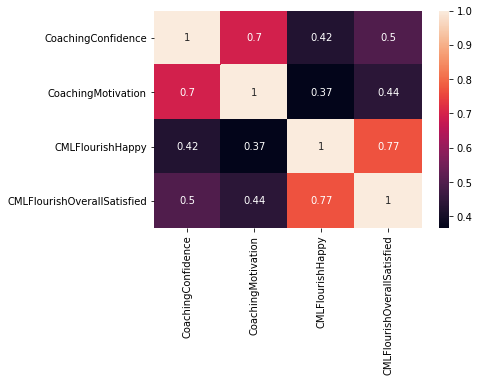

In [199]:

correlation_mat = small_survey.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()